In [3]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline
np.random.seed(1) # establece una semilla(seed) para que los resultados sean consistentes

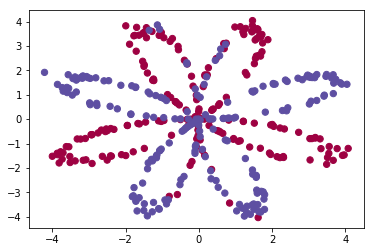

In [4]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [5]:
#Actividad 1
shape_X = X.shape
shape_Y = Y.shape
m = Y.size
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))


The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [6]:
# Entrenando el clasificador de la regresión logística
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T.ravel());

/home/alexchambi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


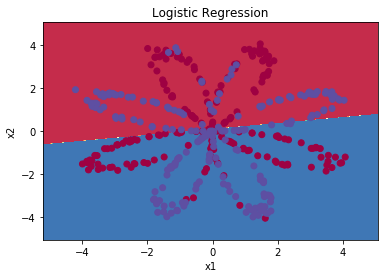

In [8]:
# Plot el límite de decisión para la regresión logística
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

# Imprimir la precesión ( accuracy)
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
      '% ' + "(percentage of correctly labelled datapoints)")

In [9]:
#Actividad 2
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [10]:
X_assess, Y_assess = layer_sizes_test_case()

(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Tamaño de la capa de entrada: n_x = " + str(n_x))
print("Tamaño de la capa oculta: n_h = " + str(n_h))
print("Tamaño de la capa de salida: n_y = " + str(n_y))

Tamaño de la capa de entrada: n_x = 5
Tamaño de la capa oculta: n_h = 4
Tamaño de la capa de salida: n_y = 2


In [11]:
# Actividd 3
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) 
    # configura una semilla para que su salida coincida con la esperada,aunque la inicialización es aleatoria.
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == ((n_h, 1)))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == ((n_y, 1)))
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}
    return parameters

In [12]:
# Probando la Funcion
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [13]:
#Actividad 4

def forward_propagation(X, parameters):
    # Recupera cada parámetro del diccionario "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implementa Forward Propagation para calcular A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2}
    return A2, cache

In [14]:
# Probando la función
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
# Note: Se calcula la media solo para asegurarnos de que su salida coincida
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [15]:
# Actividad 5
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]
    cost = (-1/m)*(np.sum(Y*np.log(A2)+ (1-Y)*np.log(1-A2)))
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

# Probando la función
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

#cost = 0.692685886972..

cost = 0.6930587610394646


In [16]:
# Actividad 6

def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    # Recuperar los datos A1 and A2 del diccionario "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    # Backward propagation: calcular dW1, db1, dW2, db2.
    
    dZ2= A2-Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2}
    return grads


In [17]:
# Probando la función
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [18]:
#Actividad 7
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    # Actualizando los parámetros
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}
    return parameters

#Probando la función
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [26]:
# Actividad 8
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # Llamando a la función: Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Llamando a la función: Forward propagation.
        A2, cache = forward_propagation(X, parameters)
        # Llamando a la función: Cost function.
        cost = compute_cost(A2, Y, parameters)
        # llamando a la funcion Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        # Llamar a la función Gradient descent parameter update.
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return parameters

In [32]:
model = nn_model(X, Y, n_h, num_iterations = 10000, print_cost=True)
print(model)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219471
Cost after iteration 9000: 0.218612
{'W1': array([[  0.14736707,  -9.68433029],
       [-11.13333849,   3.33832787],
       [-11.46609263, -13.41877294],
       [  9.25242876, -10.2008253 ]]), 'b1': array([[-0.09916578],
       [-0.39062563],
       [-0.03591183],
       [ 0.09185368]]), 'W2': array([[-11.98432499,   3.4441375 ,   6.15382294,  10.52133382]]), 'b2': array([[-0.05273596]])}


In [33]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.rint(A2)
    return predictions

parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219471
Cost after iteration 9000: 0.218612


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

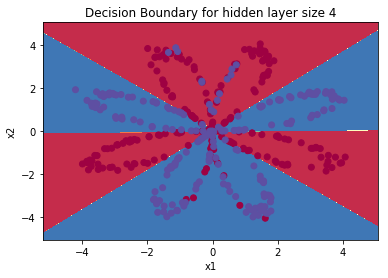

In [34]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
# Plot el límite de decisión
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
plt.title("Decision Boundary for hidden layer size " + str(4))

In [35]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-
predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
